#### Precision & Recall 

In [8]:
import numpy as np 
import pandas as pd 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression


In [10]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

def fillna_feature(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True) 
    df["Embarked"].fillna("N", inplace=True)
    
    return df 

def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df 

def encoding_feature(df):
    df["Cabin"] = df["Cabin"].str[:1]
    featrues = ["Cabin","Sex","Embarked"]
    
    for feature in featrues:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df 

def transform_feature(df):
    df = fillna_feature(df)
    df = drop_feature(df)
    df = encoding_feature(df)
    df
    return df 



In [11]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('confusion matrix')
    print(confusion)
    print("\naccuracy: {0:.4f} \npredision: {1:.4f} \nrecall: {2:.4f}".format(accuracy , precision ,recall))

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('Data\\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_feature(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

confusion matrix
[[108  10]
 [ 14  47]]

accuracy: 0.8659 
predision: 0.8246 
recall: 0.7705


In [15]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f"pred_proba() result Shape : {pred_proba.shape}")
print(f"pred_proba() 3 sample : {pred_proba[:3]}")

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f"{pred_proba_result[:3]}")

pred_proba() result Shape : (179, 2)
pred_proba() 3 sample : [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
[[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [18]:
from sklearn.preprocessing import Binarizer 

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [21]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold =custom_threshold).fit(pred_proba_1)
custom_predict =  binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

confusion matrix
[[108  10]
 [ 14  47]]

accuracy: 0.8659 
predision: 0.8246 
recall: 0.7705


In [23]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold =custom_threshold).fit(pred_proba_1)
custom_predict =  binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

confusion matrix
[[97 21]
 [11 50]]

accuracy: 0.8212 
predision: 0.7042 
recall: 0.8197


In [26]:
thresholds = [0.4 , 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f"threshold value {custom_threshold}")
        get_clf_eval(y_test, custom_predict)
    
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

threshold value 0.4
confusion matrix
[[97 21]
 [11 50]]

accuracy: 0.8212 
predision: 0.7042 
recall: 0.8197
threshold value 0.45
confusion matrix
[[105  13]
 [ 13  48]]

accuracy: 0.8547 
predision: 0.7869 
recall: 0.7869
threshold value 0.5
confusion matrix
[[108  10]
 [ 14  47]]

accuracy: 0.8659 
predision: 0.8246 
recall: 0.7705
threshold value 0.55
confusion matrix
[[111   7]
 [ 16  45]]

accuracy: 0.8715 
predision: 0.8654 
recall: 0.7377
threshold value 0.6
confusion matrix
[[113   5]
 [ 17  44]]

accuracy: 0.8771 
predision: 0.8980 
recall: 0.7213


In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)
print(precisions.shape)
print(recalls.shape)

print(thresholds[:5])
print(precisions[:5])
print(recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))
print(np.round(precisions[thr_index], 3))

print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))
      

(147,)
(148,)
(148,)
[0.11573102 0.11636721 0.11819211 0.12102773 0.12349478]
[0.37888199 0.375      0.37735849 0.37974684 0.38216561]
[1.         0.98360656 0.98360656 0.98360656 0.98360656]
[  0  15  30  45  60  75  90 105 120 135]
[0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
[0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
[0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
[1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


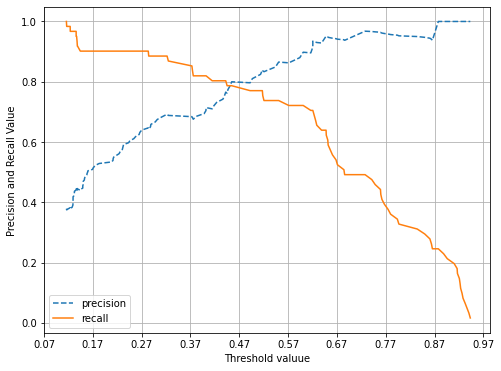

In [37]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls , thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0:thresholds_boundary], label="recall")
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold valuue")
    plt.ylabel("Precision and Recall Value")

    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])    
    
    